# Exercise 1
We will analyze the effect of the non-informative prior distribution on Bayesian inference. You aim to compare two models, one with a uniform prior, second with the beta distribution. Please, generate 200 draws of a biased coin with a probability of getting a tail equal to 0.7 and compare inference results as a function of flips number. Plot and interpret the results.

In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from cmdstanpy import set_cmdstan_path, cmdstan_path
set_cmdstan_path('/home/jaqb/Documents/cmdstan-2.26.1')
cmdstan_path()

'/home/jaqb/Documents/cmdstan-2.26.1'

#### Simulate tossing a coin 200 times, with probability of tail 0.7:

In [12]:
coin_toss = [np.random.choice([0, 1], p=[0.3, 0.7]) for _ in range(N)]

#### Count tails (represented by ones):

In [22]:
T = sum(coin_toss)
T

143

#### Stan code for model1:
<code>data {
   int&lt;lower=0&gt; T;
   int&lt;lower=0&gt; N;
}
parameters {
   real&lt;lower=0, upper=1&gt; p; 
}
model {
    p ~ uniform(0, 1); // prior for p
    T ~ binomial(N, p);
}</code>

In [4]:
model1 = CmdStanModel(stan_file='model1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model1


In [17]:
samples1 = model1.sample(data={
    'T': 143,
    'N': 200
}, output_dir='samples')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


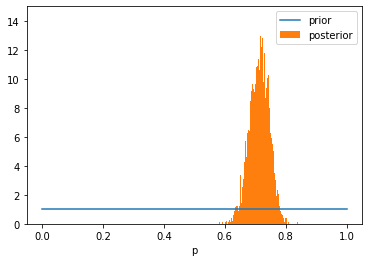

In [50]:
x = np.linspace(0, 1, 100)
plt.plot(x, stats.uniform.pdf(x))
plt.hist(samples1.stan_variable('p'), bins=100, density=True)
plt.xlabel('p')
plt.legend(['prior', 'posterior'])
plt.show()

#### Stan code for model2:
<code>data {
   int&lt;lower=0&gt; T;
   int&lt;lower=0&gt; N;
   real&lt;lower=0&gt; alfa;
   real&lt;lower=0&gt; beta;
}
parameters {
   real&lt;lower=0, upper=1&gt; p;
}
model {
    p ~ beta(alfa, beta); // prior for p
    T ~ binomial(N, p);
}</code>

In [29]:
model2 = CmdStanModel(stan_file='model2.stan')

INFO:cmdstanpy:compiling stan program, exe file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model2
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model2


In [42]:
samples2 = model2.sample(data={
    'T': 143,
    'N': 200,
    'alfa': 2,
    'beta': 5
}, output_dir='samples')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2


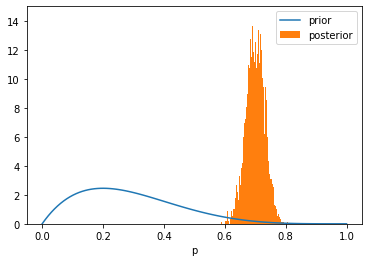

In [51]:
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, 2, 5))
plt.hist(samples2.stan_variable('p'), bins=100, density=True);
plt.xlabel('p')
plt.legend(['prior', 'posterior'])
plt.show()

In [59]:
sum(coin_toss[:6])

4

In [62]:
samples3 = model1.sample(data={
    'T': 4,
    'N': 6
}, output_dir='samples')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1


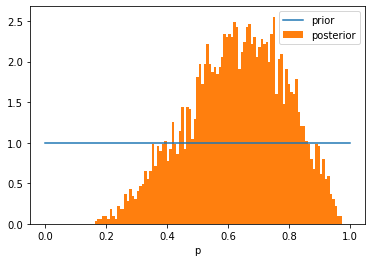

In [63]:
x = np.linspace(0, 1, 100)
plt.plot(x, stats.uniform.pdf(x))
plt.hist(samples3.stan_variable('p'), bins=100, density=True)
plt.xlabel('p')
plt.legend(['prior', 'posterior'])
plt.show()

In [64]:
samples4 = model2.sample(data={
    'T': 4,
    'N': 6,
    'alfa': 2,
    'beta': 5
}, output_dir='samples')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3


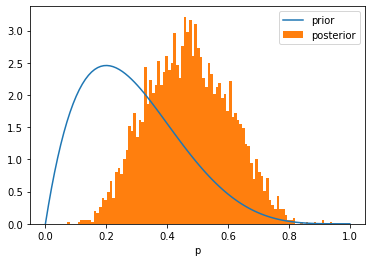

In [65]:
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, 2, 5))
plt.hist(samples4.stan_variable('p'), bins=100, density=True);
plt.xlabel('p')
plt.legend(['prior', 'posterior'])
plt.show()

# Exercise 2
We consider the number of fatal accidents and deaths on scheduled airline flights per year over a ten-year period. Source: Gelman et al. 2014 Reproduced from Statistical Abstract of the United States.
Our goal is to create a model predicting such number in 1986.

In [5]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Using the data from the following table create a model predicting the number of passenger deaths. Use Poisson distribution assuming that the accident rate is constant for all years and not depending on anything.

In [6]:
dts=[24,734,25,516,31,754,31,877,22,814,21,362,26,764,20,809,16,223,22,1066]
c1=dts[::2]
c2=dts[1::2]

Airline_data=pd.DataFrame({'Year':[1976,1977,1978,1979,1980,1981,1982,1983,1984,1985],
'Fatal accidents':c1,  
'Passenger deaths':c2,
'Death rate':[0.19,0.12,0.15,0.16,0.14,0.06,0.13,0.13,0.03,0.15]}).set_index('Year')
Airline_data['Miles flown [100 mln miles]']=np.round(Airline_data['Passenger deaths']/Airline_data['Death rate'])

In [7]:
Airline_data

,Fatal accidents,Passenger deaths,Death rate,Miles flown [100 mln miles]
Year,,,,
1976,24,734,0.19,3863.0
1977,25,516,0.12,4300.0
1978,31,754,0.15,5027.0
1979,31,877,0.16,5481.0
1980,22,814,0.14,5814.0
1981,21,362,0.06,6033.0
1982,26,764,0.13,5877.0
1983,20,809,0.13,6223.0
1984,16,223,0.03,7433.0


#### Stan code for model3:
<code>data {
    int&lt;lower=1&gt; N;
    int passengerDeaths[N];
}
parameters {
    real&lt;lower=0&gt; lambda;
}
model {
    passengerDeaths ~ poisson(lambda);
    lambda ~ normal(700, 30);
}</code>

In [79]:
model3 = CmdStanModel(stan_file='model3.stan')

INFO:cmdstanpy:compiling stan program, exe file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model3
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab3/model3


In [80]:
passengerDeaths = Airline_data['Passenger deaths'].to_list()
samples5 = model3.sample(data={
    'N': len(passengerDeaths),
    'passengerDeaths': passengerDeaths
    }, output_dir='sample')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3


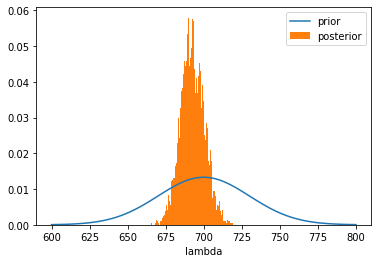

In [84]:
x = np.linspace(600,800, 100)
y = stats.norm.pdf(x, 700, 30)
plt.plot(x, y)
lambdas = samples5.stan_variable('lambda')
plt.hist(lambdas, bins=100, density=True)
plt.xlabel('lambda')
plt.legend(['prior', 'posterior'])
plt.show()